In [1]:
!export HF_DATASETS_CACHE="/mnt/data/Study/HK232/LVTN/Codes/hugging_face_cache"

In [5]:
import pandas as pd
import os

In [9]:
print(os.getcwd())

/mnt/data/Study/HK232/LVTN/Codes/LNHCodeClustering/test_files


In [10]:
df = pd.read_csv("../csv/sample_data_v5.csv")

In [38]:
filtered_df = df[(df['problem_slug'] == "Array_list_1") & df['score'] == 1] 

In [39]:
filtered_df.shape

(63, 5)

In [43]:
filtered_df['code'].to_list()

['int buyCar(int* nums, int length, int k) \n{\n    int total=0,num=0;\n    sort(nums,nums+length);\n    for(int i=0;i<length;i++)\n    {\n        if(total+nums[i]<=k)\n        {\n            total+=nums[i];\n            num++;\n        }\n    }\n    return num;\n}',
 'int buyCar(int* nums, int length, int k) {\nsort(nums, nums + length);\nint index=0;\nwhile(index< length && k>0)\n{\nif(k>= nums[index]) k-=nums[index]; else break;\nindex++;\n}\nreturn index;\n}',
 '\nint buyCar(int *nums, int length, int k)\n{\n  for (int i = 0; i < length - 1; i++)\n  {\n    for (int j = i + 1; j < length; j++)\n    {\n      if (nums[i] > nums[j])\n      {\n        int tmp = nums[i];\n        nums[i] = nums[j];\n        nums[j] = tmp;\n      }\n    };\n  };\n  int sum = 0;\n  int count = 0;\n \n  for (int i = 0; i < length; i++)\n  {\n    sum += nums[i];\n    \n    if (sum > k)\n    {\n      return count;\n    }\n    count++;\n  }\n  return count;\n}',
 'int buyCar(int* nums, int length, int k) {\n  

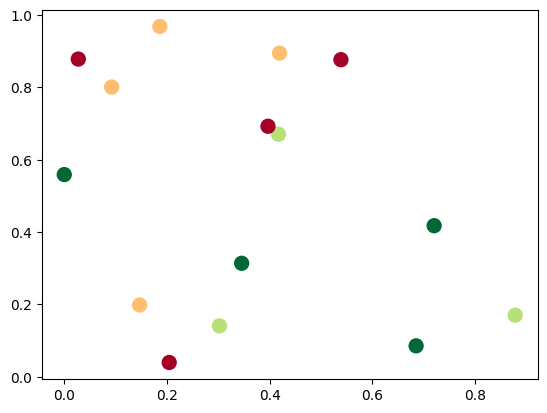

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()